# Spectra, spectrograms, and aliasing
### TSE228  Signal Processing. Lab 2, Spring 2025

## 3.3 Chirp

In [2]:
import numpy as np					# Handle signals as arrays
import matplotlib.pyplot as plt		# Show results as graphs and images
from math import pi, cos, sin, tan	# Mathematical functions on scalars
from cmath import exp, sqrt     	# Complex mathematical functions on scalars

from scipy import signal

import lab2



### 1)
The code for generating a chirp is written into lab2.py

### 2)
The code for testing the chirp function is listed below.

The sound agrees with a 3 second long tone starting at 500 Hz and ending at 300 Hz


In [4]:
import sounddevice as sd

f1 = 5000
f2 = 300
fs = 11025			# Sample rate, 1/4 of the standard 44.1 kHz
duration = 3.0

x, t, mu = lab2.make_chirp(f1, f2, fs, duration)

sd.play(x, fs)

### 3)
The spectrogram is shown below. 

It shows a 3 s long signal starting at slightly below 5000 Hz and ending at about 300 Hz. This is as expected, the first segment has an average frequency sligthly below the start value 5000 Hz.


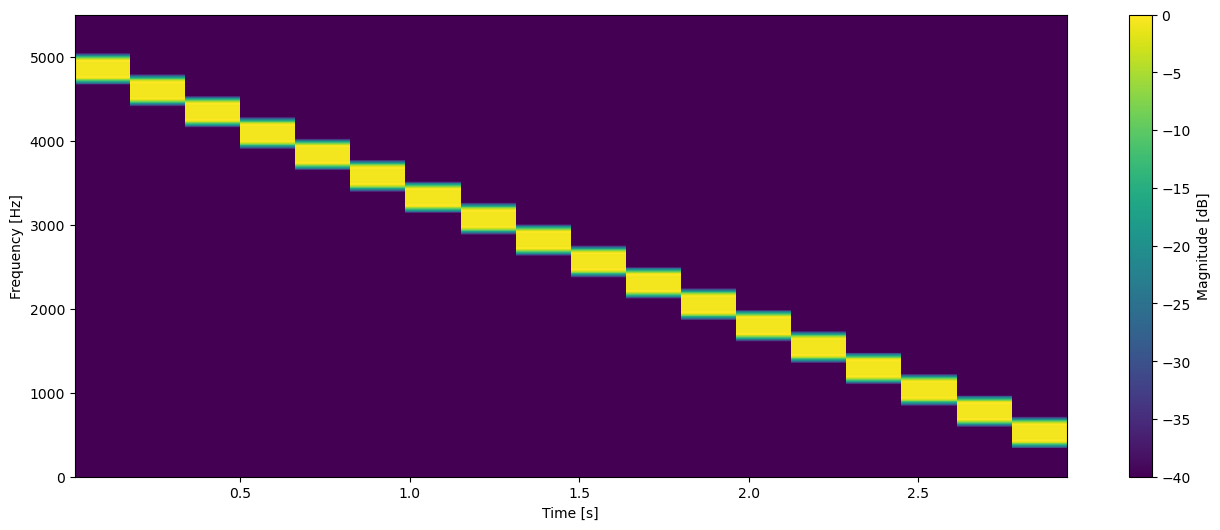

In [6]:
ax = lab2.plot_spectrogram(x, t, fs, 2048, 5500)

### 4)
The spectrograms for diffrent segment lengths are shown below.
All show the same line, but the resolution in time and frequency varies. 

The visually best balance between resolution in time and frequency is for 512 points.

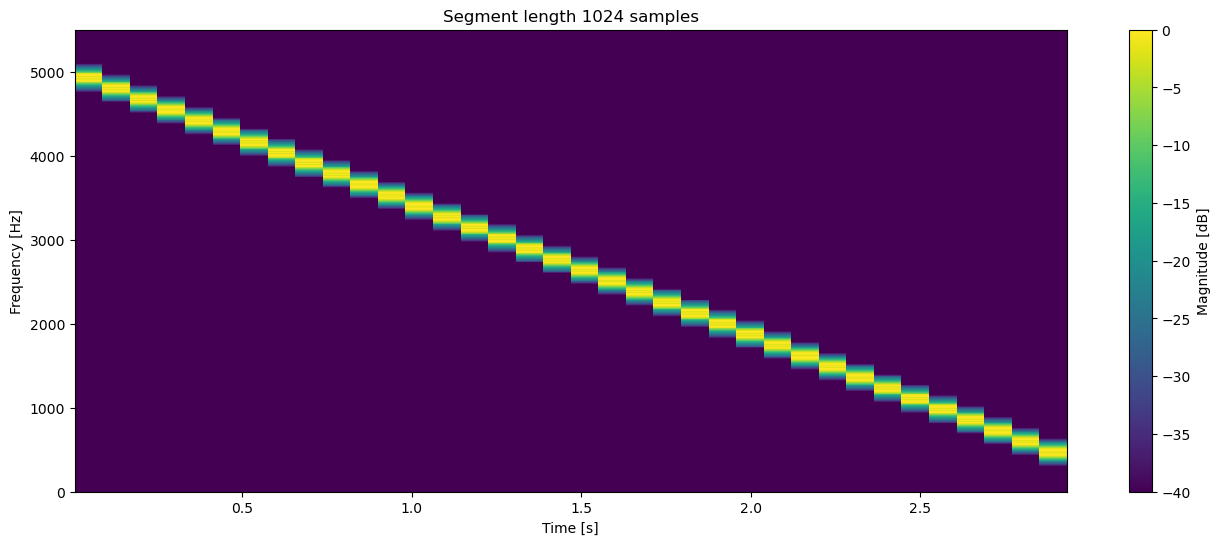

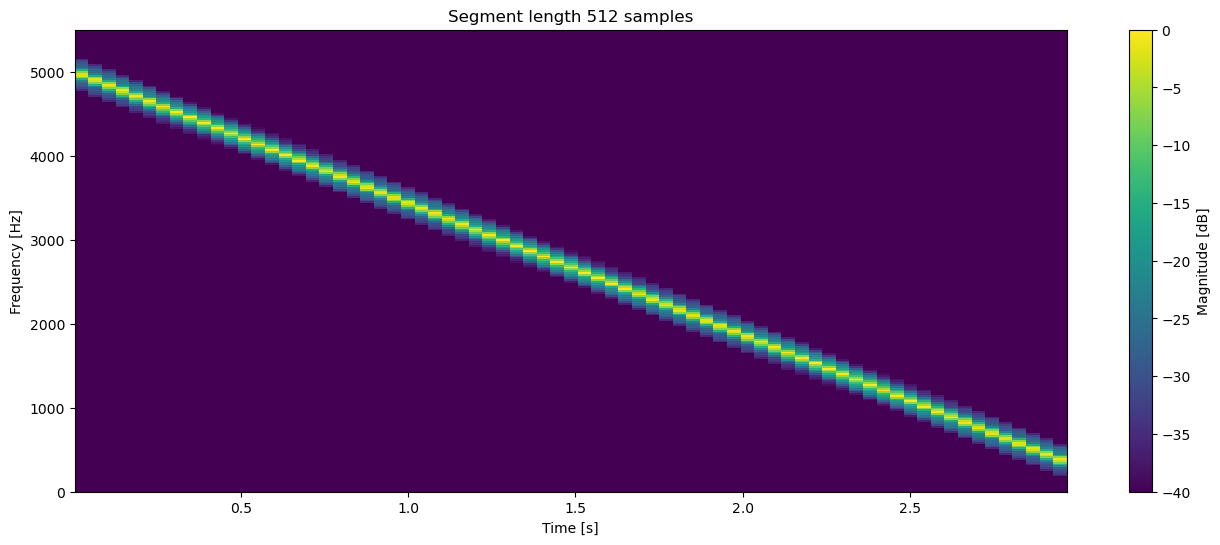

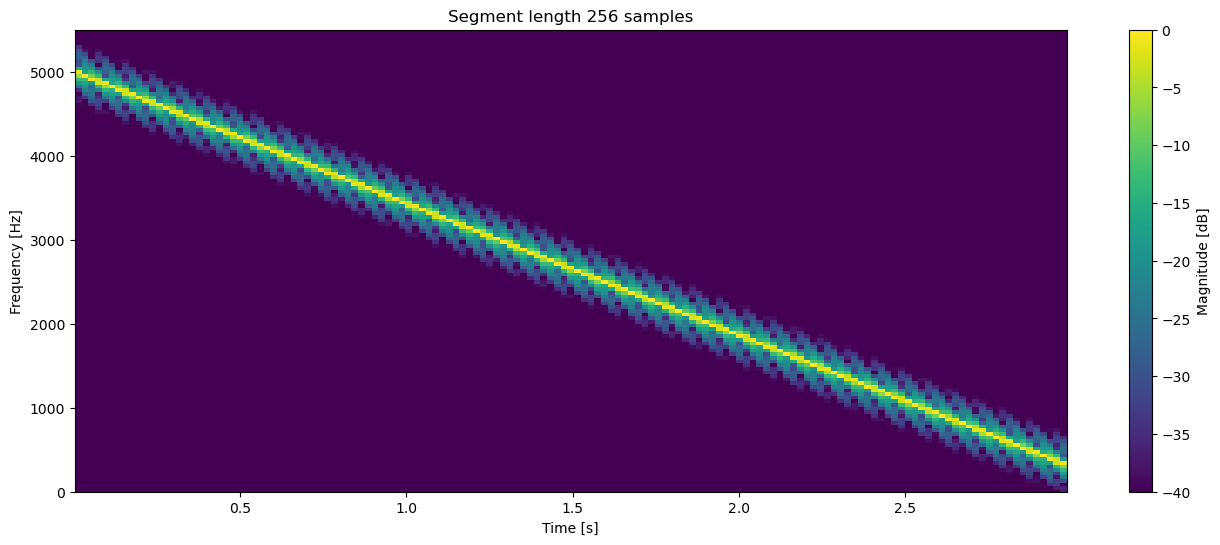

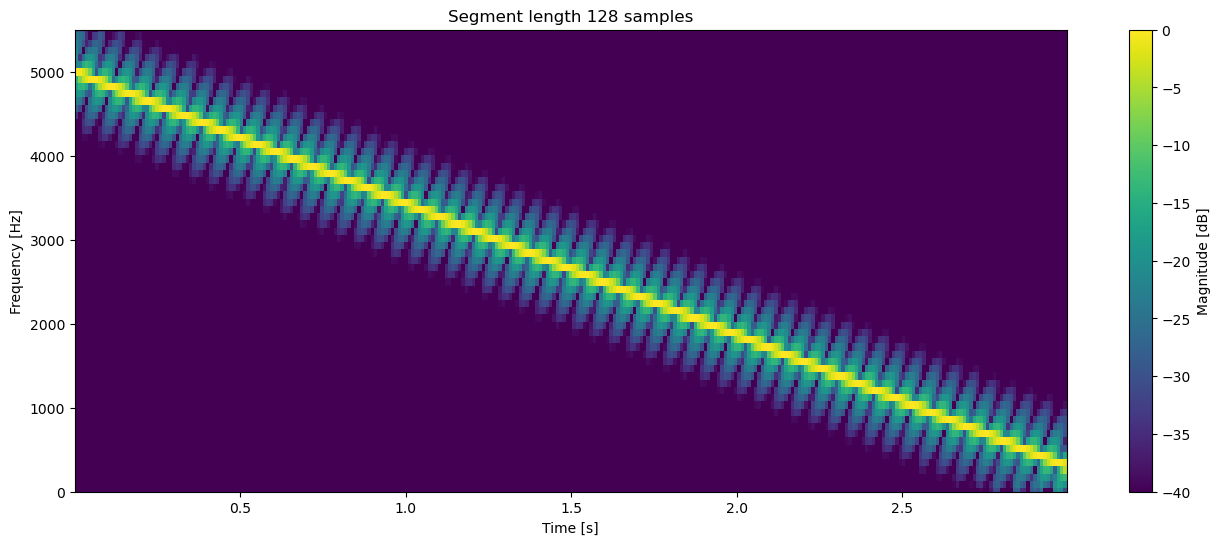

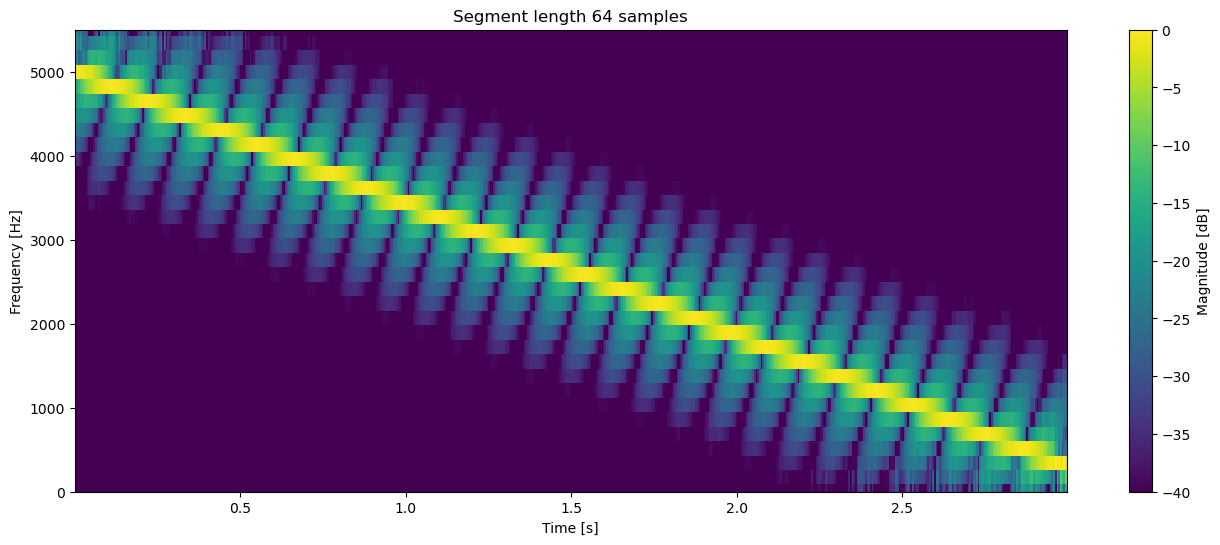

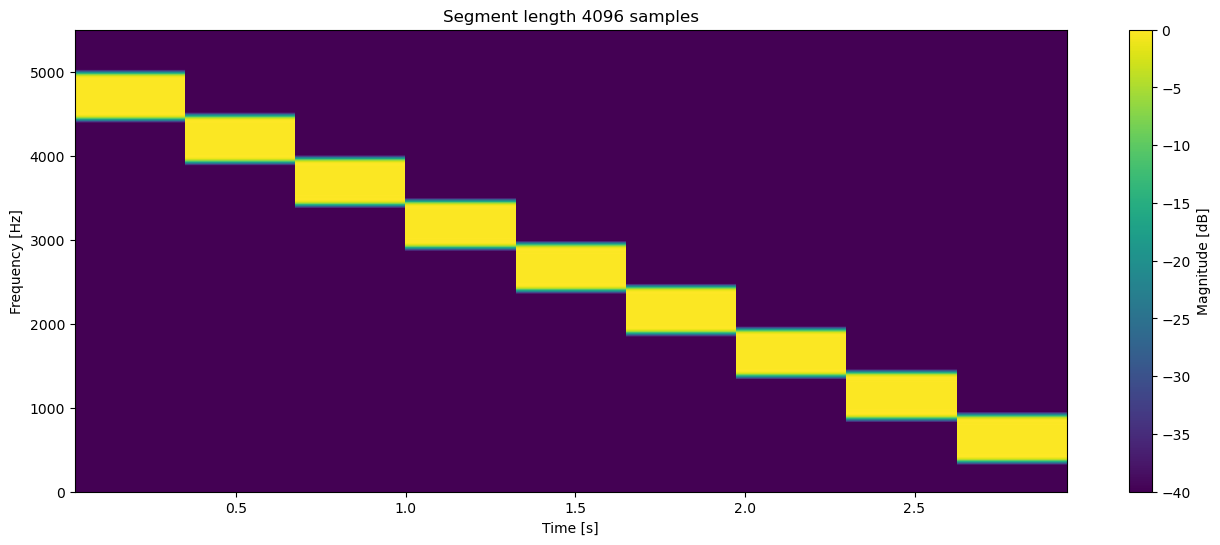

In [8]:
for n_segment in [1024, 512, 256, 128, 64, 4096]:
    ax = lab2.plot_spectrogram(x, t, fs, n_segment, 5500)
    ax.set_title(f"Segment length {n_segment} samples")


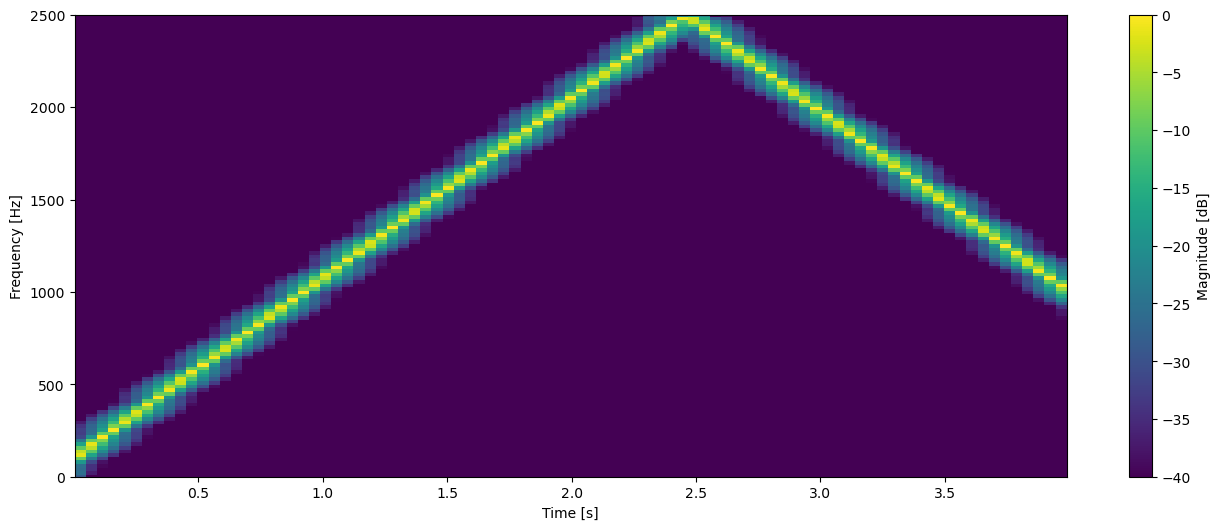

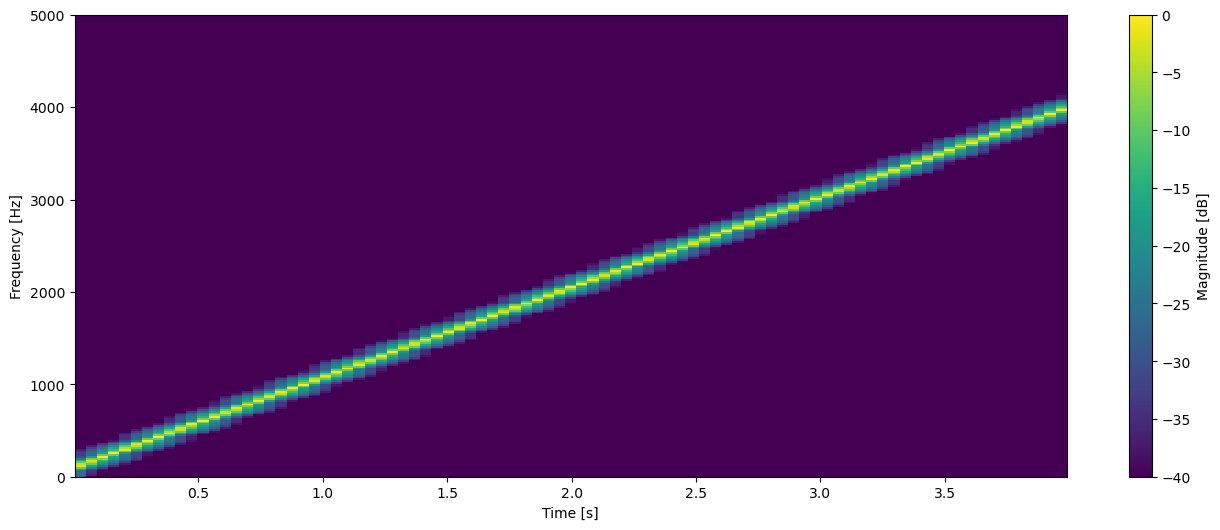

In [9]:

f1 = 100
f2 = 4000
fs = 5000 
duration = 4.0

x, t, mu = lab2.make_chirp(f1, f2, fs, duration)
ax = lab2.plot_spectrogram(x, t, fs, 256, fs/2)
sd.play(x, fs)
sd.wait()

fs= 10000
x, t, mu = lab2.make_chirp(f1, f2, fs, duration)
ax = lab2.plot_spectrogram(x, t, fs, 512, fs/2)
sd.play(x, fs)
sd.wait()


### 5)


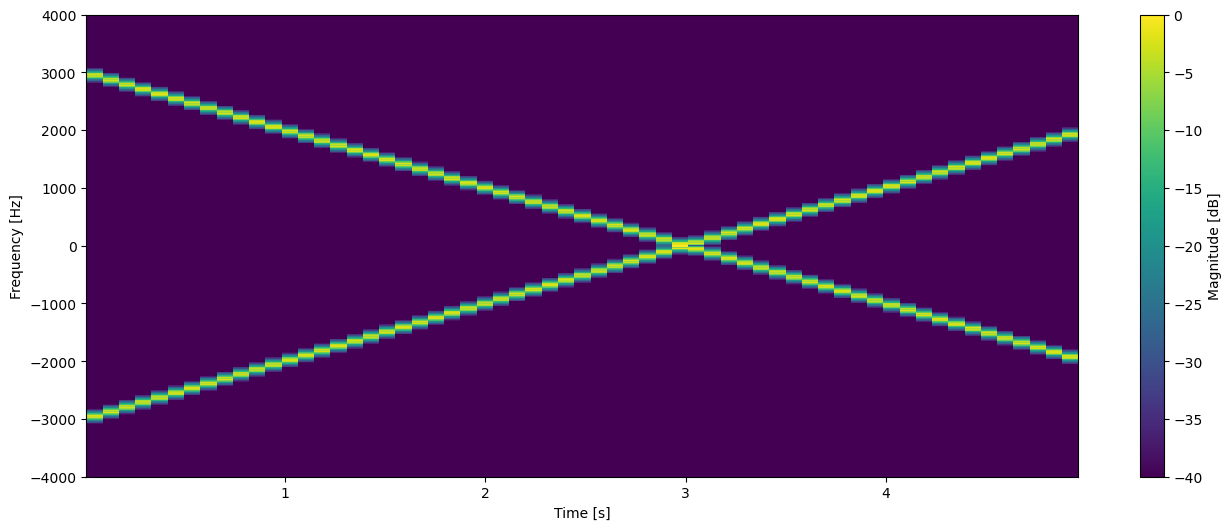

In [11]:
from scipy.fft import fft, fftshift, fftfreq	# FFT and helper functions
from scipy import signal			# Signal processing functions

f1 = 3000
f2 = -2000
fs = 11025			# Sample rate, 1/4 of the standard 44.1 kHz
duration = 5.0

sd.play(x, fs)

x, t, mu = lab2.make_chirp(f1, f2, fs, duration)

n_segment = 1024
f_max = 4000
s_min = -40       # Minimum on the intensity plot. Lower values are 'black'

# Calculate spectrogram
f, t, sx = signal.spectrogram(x, fs, nperseg=n_segment, return_onesided=False, detrend=False)
f = fftshift(f)
sx = fftshift(sx, axes=0)
sx_db = 10*np.log10(sx/sx.max())   # Convert to dB

# Plot spectrogram
fig = plt.figure(figsize=(16, 6))  # Define figure for results

ax = fig.add_subplot(1, 1, 1)
sx_image = ax.pcolormesh(t, f, sx_db, cmap='viridis', vmin=s_min)

ax.set_xlabel('Time [s]')
ax.set_ylabel('Frequency [Hz]')
ax.set_ylim(-f_max, f_max)

fig.colorbar(sx_image, label="Magnitude [dB]")  # Colorbar for intensity

